Name:Hassan Tariq
Student ID: 1700930500


1. 

    1)

    1.1 Neural Nets 
    
    g(w7 + w9h(w2 + w4x1 + w6x2) + w8h(w1 + w3x1 + w5x2))
    
    =                    1
       _______________________________________
       1 + exp(-(w7 + cw8w1 + cw9w2 + (cw8w3 + cw9w4)x1 + (cw8w5 + cw9w6)x2))
       
       
Classification Boundary is : w7 + cw8w1 + cw9w2 + (cw8w3 + cw9w4)x1 + (cw8w5 + cw9w6)x2 = 0


2)If linear activation functions are used for all hidden units then output from the hidden units can be written as linear combination of input features. So this is true. 
    

1.2 Bayesian Rules and Bayesian Network

    1)Pr(a,b,c,d,e,f,g) = Pr(a) * Pr(b | a) * Pr (c | b) * Pr (d | c,f) * Pr(e | d) * Pr (f | g) * Pr(g)
    
    
    
    2) P(K= 1| a= 1, b= 1, c = 0 ) =  P(K = 1 , a = 1, b = 1, c = 0)
                                      -----------------------------
                                       P (a = 1, b = 1, c = 0)
                                           
                                    =   P(K = 1) * P(a = 1 | K = 1) * P ( b = 1 | K = 1) * P ( c = 0 | K = 1)
                                        --------------------------------------------------------------------
                                         P(a = 1, b = 1, c = 0, K = 1) + P(a = 1, b = 1, c = 0, K = 0)
                                    
                                    
                                    =   (1/2 * 1/2 * 1/4 * 1/2)
                                  
                                       --------------------------
                                       
                                        0        +         1/8
                                        
                                      = 1
                                        -
                                        4
                                        
      P(K= 0 | a= 1 , b= 1) = P (K = 0, a = 1, b = 1)
                              ----------------------
                                  P(a = 1 , b = 1)
                           
                            =  P(K = 0) * P (a = 1 | K = 0) * P (b = 1 | K = 0)
                               ------------------------------------------------
                                P(a = 1, b = 1, K = 0) + P(a = 1, b = 1, K = 0)
                            
                            
                            =  4/8 * 2/8*4/8 * 2/8*4/8
                              ------------------------
                               1/8        +     1/8
                               
                            = 1/2 * 1/2 * 1/2
                              ---------------
                                 1/4
                            
                            
                            =  1
                               -
                               2
                                   
                                
                                
       



In [2]:
#imports
import pandas as p
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

#read dataset
dataset = p.read_csv("otto.csv")
classes = []
instances = 0

print("Number of Classes ", end = " : ")
print(len(np.unique(dataset['target'])))
print("Number of instances " ,end = ':')
print(len(dataset))

#print classes
print((np.unique(dataset['target'])))

#remove non numerical class labels
dataset['target'] = dataset['target'].apply(lambda x: x.replace('Class_',''))
dataset['target'] = p.to_numeric(dataset['target'])


#check for null values and confirm there are no rows with all 0s
for i in dataset.columns.values:
    if dataset[i].isnull().any():
        print(dataset[i])

for i in dataset.columns.values:
    if dataset[i].isnull().sum:
        print(dataset[i])

print("Number of instances " ,end = ':')
print(len(dataset))
        


Number of Classes  : 9
Number of instances :61878
['Class_1' 'Class_2' 'Class_3' 'Class_4' 'Class_5' 'Class_6' 'Class_7'
 'Class_8' 'Class_9']
0            1
1            2
2            3
3            4
4            5
         ...  
61873    61874
61874    61875
61875    61876
61876    61877
61877    61878
Name: id, Length: 61878, dtype: int64
0        1
1        0
2        0
3        1
4        0
        ..
61873    1
61874    4
61875    0
61876    1
61877    0
Name: feat_1, Length: 61878, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
61873    0
61874    0
61875    0
61876    0
61877    0
Name: feat_2, Length: 61878, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
61873    0
61874    0
61875    0
61876    0
61877    0
Name: feat_3, Length: 61878, dtype: int64
0        0
1        0
2        0
3        1
4        0
        ..
61873    1
61874    0
61875    0
61876    0
61877    0
Name: feat_4, Length: 61878, dtype: int64
0 

This shows us that when were trying to check for null data that theres no invalid data in set. Additonnaly, no instance is dropped which shows us that theres are no rows with all 0s.

In [3]:

#imports
from sklearn.neighbors import KNeighborsClassifier


#read dataset
dataset = p.read_csv("otto.csv")

#remove non numerical class labels
dataset['target'] = dataset['target'].apply(lambda x: x.replace('Class_',''))
dataset['target'] = p.to_numeric(dataset['target'])


#Create KNN Object.
knn = KNeighborsClassifier()

#Create x and y variables.
x = dataset.drop(columns=['target'])
y = dataset['target']

#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

#Training the model.
knn.fit(x_train, y_train)

#Predict test data set.
y_pred = knn.predict(x_test)


n_neighbors = list(range(1,30))

hyperparameters = {'n_neighbors' : n_neighbors ,'weights' : ['uniform','distance'],'metric' : ['euclidean','manhattan']}


#Use GridSearch
clf = GridSearchCV(knn, hyperparameters, n_jobs=-1, verbose = 1, cv = 2)

#Fit the model
best_model_knn = clf.fit(x_train,y_train)
prediction_knn = best_model_knn.predict(x_test)


Fitting 2 folds for each of 116 candidates, totalling 232 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 232 out of 232 | elapsed:  5.9min finished


In [6]:
#imports
from sklearn.linear_model import LinearRegression


#Create linear regression Object.
reg = LinearRegression()

#Training the model.
reg.fit(x_train, y_train)

#Predict test data set.
y_pred = reg.predict(x_test)


hyperparameters = {'fit_intercept':('True', 'False'), 'normalize':('True', 'False'), 'copy_X':('True', 'False')}


clf = GridSearchCV(reg, hyperparameters, n_jobs=-1, verbose = 1, cv = 2)

#fit the model
best_model_reg = clf.fit(x_train,y_train)
prediction_reg = best_model_reg.predict(x_test)



Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    4.5s finished


In [7]:
#imports
from sklearn.ensemble import RandomForestClassifier


#Create random forest Object.
rf_model = RandomForestClassifier()

#Training the model.
rf_model.fit(x_train, y_train)

#Predict test data set.
y_pred = rf_model.predict(x_test)


hyperparameters = {'n_estimators': [50, 150, 250],
                   'max_features': ['sqrt', 'auto','log2']}
                

clf = GridSearchCV(rf_model, hyperparameters, n_jobs=-1, verbose = 1, cv = 2)

#fit the model
best_model_rf = clf.fit(x_train,y_train)
prediction_rf = best_model_rf.predict(x_test)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  4.1min finished


In [8]:
#imports
from sklearn.neural_network import MLPClassifier

#Create neural network Object.
neural_model = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)


#Training the model.
neural_model.fit(x_train, y_train)

#Predict test data set.
y_pred = neural_model.predict(x_test)


hyperparameters={
'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
'activation': ['tanh', 'relu'],
'solver': ['sgd', 'adam'],
'alpha': [0.0001, 0.05],
'learning_rate': ['constant','adaptive']
}


clf = GridSearchCV(neural_model, hyperparameters, n_jobs=-1, verbose = 1, cv = 2)
best_model_neural_network = clf.fit(x_train,y_train)
prediction_neural_network = best_model_neural_network.predict(x_test)


Iteration 1, loss = 10793221350245621044631409715099486703848143437394363509162638023197557354839043068513797103801800519724758059437369811951031948566307901074658001900859918315125263634982585809046758963567613396448957437629693952.00000000
Iteration 2, loss = 11989584365998696324547087772761165524624821734885490728828599832602827149957783347292953473952765301135117830398089088870002335979430634661896997540469577199660227530413504678023046731140968168690796408107696128.00000000
Iteration 3, loss = 11989554516683723670337910159599559302604025352279687050352491652419226704445012731060231063549814689653692911303493177270549446188872773481407229566566562269503724023350942231771007894931042476309644077141327872.00000000
Iteration 4, loss = 11989524667430623842823879597833101221291162981230976206933787686958826807909700342720683046970291719840549958937056957884178563472331276702558458060508523078419467447336945843984136591640333469358270072812994560.00000000
Iteration 5, loss = 119894948182

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 24.3min finished


Iteration 1, loss = 23.51409690
Iteration 2, loss = 20.93697642
Iteration 3, loss = 15.74746912
Iteration 4, loss = 13.08083293
Iteration 5, loss = 11.04182790
Iteration 6, loss = 7.83862111
Iteration 7, loss = 5.22247909
Iteration 8, loss = 5.42533573
Iteration 9, loss = 5.41982388
Iteration 10, loss = 5.05464287
Iteration 11, loss = 4.51085065
Iteration 12, loss = 3.90516806
Iteration 13, loss = 3.30280265
Iteration 14, loss = 5.38709254
Iteration 15, loss = 3.27751412
Iteration 16, loss = 1.91676093
Iteration 17, loss = 3.65665399
Iteration 18, loss = 3.20251492
Iteration 19, loss = 3.97663956
Iteration 20, loss = 1.63595161
Iteration 21, loss = 1.89027966
Iteration 22, loss = 2.14802048
Iteration 23, loss = 1.95716242
Iteration 24, loss = 1.62784243
Iteration 25, loss = 3.27240851
Iteration 26, loss = 2.04411377
Iteration 27, loss = 1.00018903
Iteration 28, loss = 3.02793739
Iteration 29, loss = 1.37977855
Iteration 30, loss = 1.39511173
Iteration 31, loss = 0.92377329
Iteration 32

In [9]:
#imports
from sklearn.naive_bayes import BernoulliNB

#Create bernoulli  model.
bll = BernoulliNB()



hyperparameters={
    'alpha' : [0.001,0.005,0.10]
}


clf = GridSearchCV(bll, hyperparameters, n_jobs=-1, verbose = 1, cv = 2)
best_model_bll = clf.fit(x_train,y_train)
prediction_bll = best_model_bll.predict(x_test)



Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    6.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    6.6s finished


In [10]:
#imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


#create a adaboost object
DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)
AdaBoost = AdaBoostClassifier(base_estimator = DTC)

hyperparameters={"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
}



clf = GridSearchCV(AdaBoost, hyperparameters, n_jobs=-1, verbose = 1, cv = 2)
best_model_adaboost = clf.fit(x_train,y_train)
prediction_adaboost = best_model_adaboost.predict(x_test)


Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    4.8s finished


In [11]:
#imports
from sklearn.svm import SVC

#create a SVC object
lsvm = SVC()


#parameters
hyperparameters = {
    'kernel': ['rbf']
}
            
            
clf = GridSearchCV(lsvm, hyperparameters, n_jobs=-1, verbose = 1)

best_model_svc = clf.fit(x_train,y_train)
prediction_svc = best_model_svc.predict(x_test)



Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.1min finished


In [12]:
#imports
from sklearn.metrics import f1_score

prediction_reg = np.rint(prediction_reg).astype(np.int)

#list
f1_scores = {
    "KNN" : f1_score(y_test,prediction_knn,average = 'weighted'),
    "reg" : f1_score(y_test,prediction_reg,average = 'weighted'),
     "RF" : f1_score(y_test,prediction_rf, average = 'weighted'),
     "NN" : f1_score(y_test,prediction_neural_network,average = 'weighted'),
     "bll": f1_score(y_test,prediction_bll,average = 'weighted'),
     "AB" : f1_score(y_test,prediction_adaboost,average = 'weighted'),
     "SVC": f1_score(y_test,prediction_svc,average = 'weighted'),
    }

print("Algorithm \t\t\t F1 Measure")
print()
for score in f1_scores:
    print("{0}\t\t\t{1}".format(score,str(np.round(f1_scores[score],3))))



Algorithm 			 F1 Measure

KNN			1.0
reg			0.68
RF			0.995
NN			0.913
bll			0.597
AB			0.861
SVC			0.999


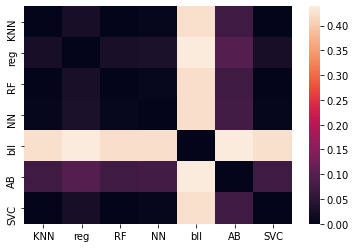

In [13]:
#imports
from sklearn.metrics import pairwise_distances
import seaborn as s

y_predictions = np.array(
[prediction_knn, prediction_reg, prediction_rf, prediction_neural_network,prediction_bll, prediction_adaboost,prediction_svc]
)

p = pairwise_distances(y_predictions,metric = 'correlation')

labels =[
    
    "KNN","reg","RF","NN","bll","AB","SVC"
    
]

s.heatmap(p,xticklabels = labels, yticklabels = labels)
